In [2]:
import warnings
import random
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%pip install plotly
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

COLOR_IDENTITY = ['#58DCED', '#5CBBF7', '#5F8AE0', '#4D57FA', '#7A58ED', '#280096', '#E3D322']

choose_color_combo = lambda x,k: random.sample(x,k)

#rascunho do relatório = https://docs.google.com/document/d/1LPg9JqXzrwTg4S8zVCaeh7EYKcCoAeJwXzxYCJStXmU/edit?usp=sharing [ONLY AUTHORIZED PERSONNEL]


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('datasets/hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Análise exploratória e limpeza dos dados

## _Valores duplicados_

In [4]:
print(f'ANTES = {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)
print(f'DEPOIS = {df.duplicated().sum()}')

ANTES = 31994
DEPOIS = 0


## _Buscando por valores nulos em todas as colunas_

In [5]:
ord_null_col = df.isnull().sum().sort_values(ascending=False)
percen_null_col = round((df.isnull().sum().sort_values(ascending=False) * 100) / len(df), 2)

overall_null_col = pd.concat(
    [ord_null_col[ord_null_col > 0], percen_null_col[percen_null_col > 0]],
    axis=1
)
overall_null_col.columns = ['Quantidade', 'Porcentagem']
overall_null_col


,Quantidade,Porcentagem
company,82137,93.98
agent,12193,13.95
country,452,0.52
children,4,NaN


comentário [1]

In [6]:
# substituir valores das colunas agent e company por 0, além de usar o valor mais frequente (moda) para substituir na coluna country (vide comentário)
vals_to_repl = {
    'company': 0,
    'agent': 0,
    'country': df.country.mode()[0]
}
df.fillna(value=vals_to_repl, inplace=True)

# eliminando os valores da coluna children
df.dropna(subset=['children'], inplace=True)

# verificação
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## _Verificar corretude de valores categóricos_

In [7]:
# reconhecendo colunas que possuem valores categóricos
cat_vals = [col for col in df.columns if df[col].dtype == 'object']

# analisando atual estado de cada coluna
for col in cat_vals:
    sep = '~'*25
    print(f'~> {col}\n{df[col].unique()}\n{sep}\n')

~> hotel
['Resort Hotel' 'City Hotel']
~~~~~~~~~~~~~~~~~~~~~~~~~

~> arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
~~~~~~~~~~~~~~~~~~~~~~~~~

~> meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
~~~~~~~~~~~~~~~~~~~~~~~~~

~> country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT'

comentario [2]

In [8]:
# removendo valor undefined da coluna meal
print(f'Valor ANTES da operação = \n{df.meal.value_counts()}')
df.meal.replace(
    to_replace='Undefined',
    value='SC',
    inplace = True
)
print(f'\n\nValor DEPOIS da operação = \n{df.meal.value_counts()}')

Valor ANTES da operação = 
BB           67974
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64


Valor DEPOIS da operação = 
BB    67974
SC     9973
HB     9085
FB      360
Name: meal, dtype: int64


## _Procurando valores incoerentes_

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000,87392.000000
mean,0.274865,79.894887,2016.210351,26.838086,15.815967,1.005275,2.625412,1.875778,0.138640,0.010825,0.039077,0.030415,0.183999,0.271615,81.008101,11.017313,0.749600,106.340758,0.084230,0.698542
std,0.446449,86.052720,0.686069,13.674835,8.835086,1.031928,2.053594,0.626503,0.455881,0.113599,0.193779,0.369154,1.731933,0.727260,109.946968,54.048670,10.015959,55.012457,0.281539,0.831951
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


comentario [3]

In [10]:
# removendo registros onde a quantidade de adultos é 0
print(f'ANTES = {len(df[df.adults == 0])}')
df.drop(df[df.adults == 0].index, inplace=True)
print(f'DEPOIS = {len(df[df.adults == 0])}')

ANTES = 385
DEPOIS = 0


## _Outliers_

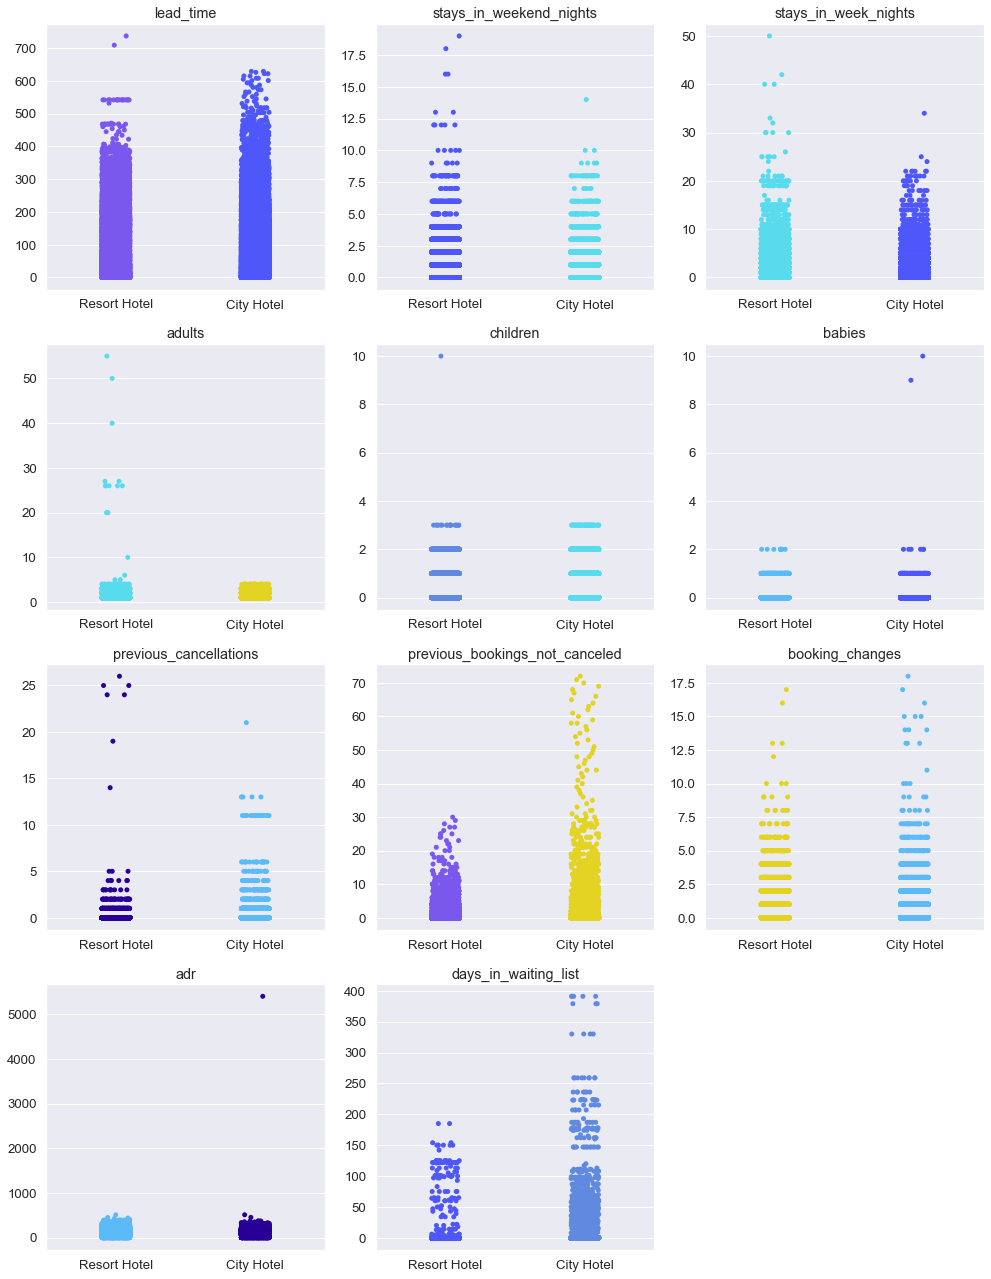

In [11]:
# Visualização do comportamento dos dados com base na diferença de tipos de hoteis

features = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults', 'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'adr',
    'days_in_waiting_list'
]

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (14, 18))

for feature in features:
    plt.subplot(4,3,n)
    sns.stripplot(x=df.hotel, y=df[feature], palette=choose_color_combo(COLOR_IDENTITY,2)).set(xlabel=None, ylabel=None)
    plt.title(f'{feature}')
    n = n + 1
    plt.tight_layout()

comentario [5]

In [12]:
# Removendo valores únicos muito fora da margem
df.drop(df[df.adr == 5400].index, inplace=True)
df.drop(df[df.children == 10].index, inplace=True)
df.drop(df[df.babies >= 9].index, inplace=True)

In [13]:
# Corrigindo alguns valores discrepantes
df.loc[df.lead_time > 400, 'lead_time'] = 400
df.loc[df.stays_in_weekend_nights > 6, 'stays_in_weekend_nights'] = 6
df.loc[df.stays_in_week_nights > 12, 'stays_in_week_nights'] = 12
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.booking_changes > 5, 'booking_changes'] = 5


## _Combinação de informação de colunas_

In [14]:
# Combinando informações sobre datas
df['arrival_date_year'] = df.arrival_date_year.astype('str')
df['arrival_date_month'] = df.arrival_date_month.astype('str')
df['arrival_date_day_of_month'] = df.arrival_date_day_of_month.astype('str')

df['arrival_date'] = df.arrival_date_day_of_month + '-' + df.arrival_date_month + '-' + df.arrival_date_year
df['arrival_date'] = pd.to_datetime(df.arrival_date, errors='coerce')

df.drop(labels=['arrival_date_year', 'arrival_date_day_of_month'], axis=1, inplace=True)
df['arrival_date_month'] = df.arrival_date.dt.month

In [15]:
# Combinando informações sobre hóspedes com crianças
df['kids'] = df.children + df.babies
df['total_guests'] = df.kids + df.adults
df['is_family'] = np.where(df.kids > 0, '1', '0')

df.drop(labels=['children', 'babies'], axis=1, inplace=True)

In [16]:
# Tempo total de permanência no hotel
df['total_stays'] = df.stays_in_week_nights + df.stays_in_weekend_nights

In [17]:
# Outras alterações
df['is_repeated_guest'] = df.is_repeated_guest.astype('str')
df['is_canceled'] = df.is_canceled.astype('str')
df['previous_cancellations'] = df.previous_cancellations.astype('str')
df['previous_bookings_not_canceled'] = df.previous_bookings_not_canceled.astype('str')

In [18]:
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,kids,total_guests,is_family,total_stays
0,Resort Hotel,0,342,7,27,0,0,2,BB,PRT,...,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0.0,2.0,0,0
1,Resort Hotel,0,400,7,27,0,0,2,BB,PRT,...,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0.0,2.0,0,0
2,Resort Hotel,0,7,7,27,0,1,1,BB,GBR,...,75.00,0,0,Check-Out,2015-07-02,2015-07-01,0.0,1.0,0,1
3,Resort Hotel,0,13,7,27,0,1,1,BB,GBR,...,75.00,0,0,Check-Out,2015-07-02,2015-07-01,0.0,1.0,0,1
4,Resort Hotel,0,14,7,27,0,2,2,BB,GBR,...,98.00,0,1,Check-Out,2015-07-03,2015-07-01,0.0,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,8,35,2,5,2,BB,BEL,...,96.14,0,0,Check-Out,2017-09-06,2017-08-30,0.0,2.0,0,7
119386,City Hotel,0,102,8,35,2,5,3,BB,FRA,...,225.43,0,2,Check-Out,2017-09-07,2017-08-31,0.0,3.0,0,7
119387,City Hotel,0,34,8,35,2,5,2,BB,DEU,...,157.71,0,4,Check-Out,2017-09-07,2017-08-31,0.0,2.0,0,7
119388,City Hotel,0,109,8,35,2,5,2,BB,GBR,...,104.40,0,0,Check-Out,2017-09-07,2017-08-31,0.0,2.0,0,7


In [19]:
# df.to_csv('preprocessed_df.csv', index=False)

# Visualização dos dados

In [20]:
confirmed_bookings = df[df.is_canceled == '0']
canceled_bookings = df[df.is_canceled == '1']

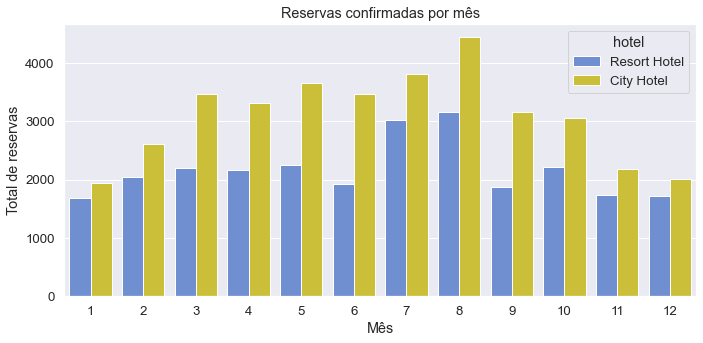

In [21]:
plt.figure(figsize = (10, 5))
import random
sns.countplot(
    x='arrival_date_month',
    data=confirmed_bookings,
    hue='hotel',
    palette=choose_color_combo(COLOR_IDENTITY,2)
)
plt.title('Reservas confirmadas por mês',)
plt.xlabel('Mês')
plt.ylabel('Total de reservas')

plt.tight_layout()

In [22]:
# %pip install --upgrade nbformat

In [39]:
country_visitors = confirmed_bookings.groupby(['country']).size().reset_index(name='Qtd')

fig = px.choropleth(
       country_visitors,
       locations='country',
       color='Qtd' ,
       hover_name='country',
       color_continuous_scale=choose_color_combo(COLOR_IDENTITY,2),
       projection='orthographic',
       title='País de origem dos hóspedes'
)
fig

In [41]:
fig.write_html('home_country_plot.html')

comentario [6]

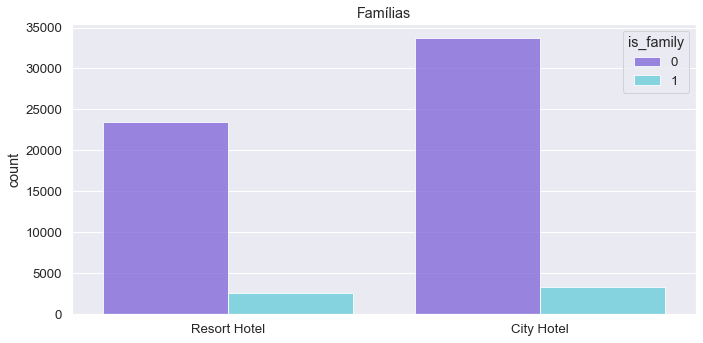

In [24]:
plt.figure(figsize = (10, 5))

sns.countplot(
    data=confirmed_bookings,
    x='hotel',
    hue='is_family',
    palette=choose_color_combo(COLOR_IDENTITY,2),
    alpha=0.8).set(xlabel=None)
plt.title('Famílias')

plt.tight_layout()

comentario [7]

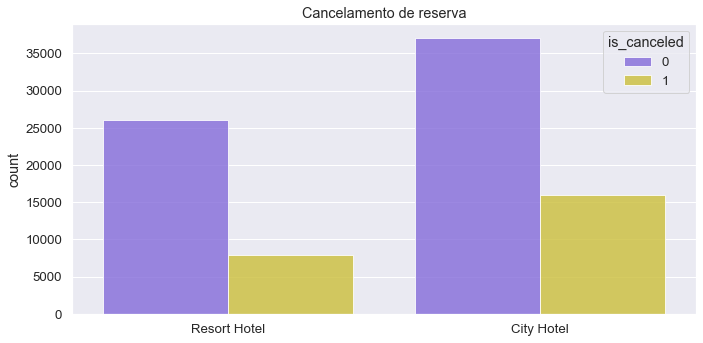

In [25]:
plt.figure(figsize = (10, 5))

sns.countplot(
    x='hotel',
    data=df,
    hue='is_canceled',
    palette=choose_color_combo(COLOR_IDENTITY, 2),
    alpha=0.8).set(xlabel = None)
plt.title('Cancelamento de reserva')

plt.tight_layout()

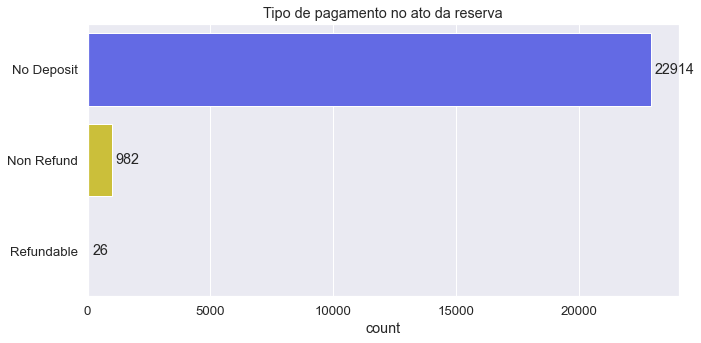

In [43]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(
    ax=ax,
    y='deposit_type',
    data=canceled_bookings,
    orient='h',
    palette=choose_color_combo(COLOR_IDENTITY, 3)).set(ylabel = None)
ax.bar_label(ax.containers[0], padding = 4)
plt.title('Tipo de pagamento no ato da reserva')

plt.tight_layout()

comentario [8]

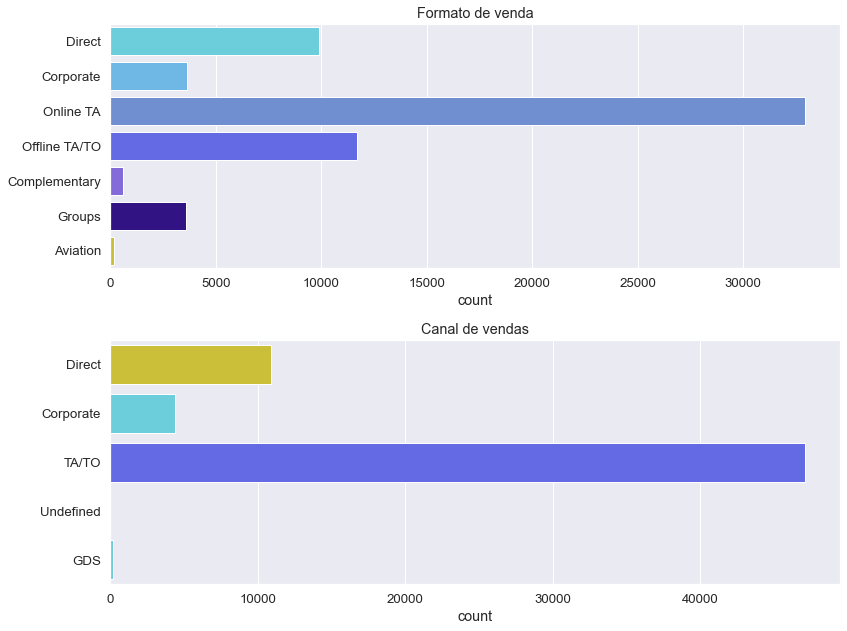

In [44]:
plt.figure(figsize = (12, 9))

plt.subplot(2,1,1)
sns.countplot(
    data=confirmed_bookings,
    y='market_segment',
    orient='h',
    palette=COLOR_IDENTITY).set(ylabel=None)
plt.title('Formato de venda')

plt.subplot(2,1,2)
sns.countplot(
    data=confirmed_bookings,
    y='distribution_channel',
    orient='h',
    palette=choose_color_combo(COLOR_IDENTITY, 3)).set(ylabel=None)
plt.title('Canal de vendas')

plt.tight_layout()

<Figure size 1008x360 with 0 Axes>

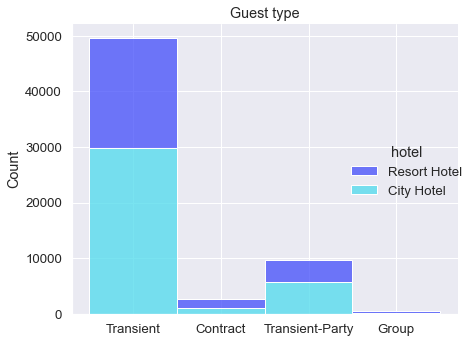

In [47]:
plt.figure(figsize = (14, 5))

sns.displot(
    confirmed_bookings,
    x='customer_type',
    hue='hotel',
    multiple='stack',
    palette=choose_color_combo(COLOR_IDENTITY, 2),
    alpha = 0.8).set(xlabel = None)
plt.title('Guest type')

plt.tight_layout()

comentario [9]

In [29]:
labels = confirmed_bookings.meal.unique()
values = confirmed_bookings.meal.value_counts()

fig = go.Figure(
      data=[go.Pie(
                  labels=labels,
                  values = values,
                  hole=.5,
                  title='Meal',
                  legendgroup = True,
                  pull = [0.1, 0.1, 0.1, 0.1]
            )
      ]
)

fig.update_traces(marker=dict(colors=choose_color_combo(COLOR_IDENTITY, 4)))

fig.show()

comentario [10]

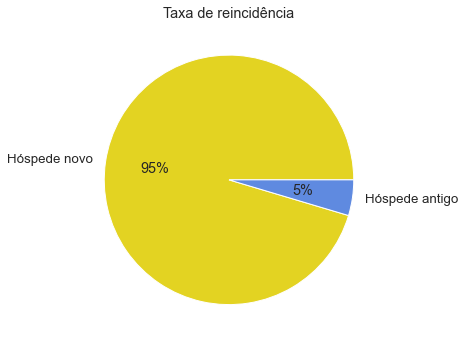

In [51]:
plt.figure(figsize = (10, 5))

data = confirmed_bookings.is_repeated_guest.value_counts()
labels = ['Hóspede novo', 'Hóspede antigo']

plt.pie(
    data,
    labels=labels,
    autopct='%.0f%%',
    colors=choose_color_combo(COLOR_IDENTITY,2))
plt.title('Taxa de reincidência')

plt.tight_layout()

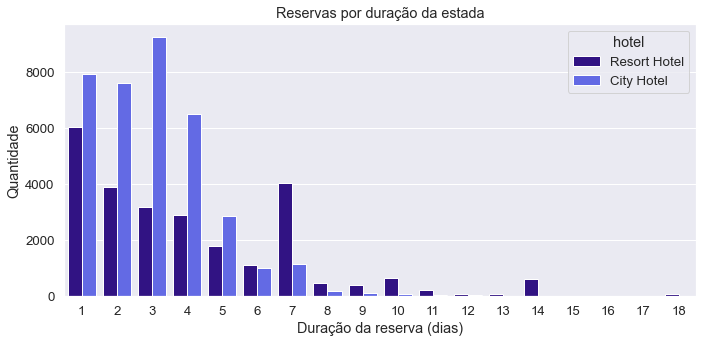

In [53]:
plt.figure(figsize = (10, 5))

confirmed_bookings = confirmed_bookings[confirmed_bookings.total_stays > 0]

sns.countplot(
    x='total_stays',
    data=confirmed_bookings,
    hue='hotel',
    palette=choose_color_combo(COLOR_IDENTITY,2)
)
plt.title('Reservas por duração da estada')
plt.xlabel('Duração da reserva (dias)')
plt.ylabel('Quantidade')

plt.tight_layout()

comentario [11]